In [1]:
from tensorflow.keras.models import model_from_json
from keras.preprocessing.image import load_img
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
json_file = open("deepfake11.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("deepfake11.h5")

In [3]:
label = ["Fake","Real"]

In [8]:
def ef(image):
    ##img = load_img(image,color_mode="grayscale")
    img = Image.open(image)
    img = img.convert('L')
    new_size = (48,48)
    img = img.resize(new_size)
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
model prediction is  Real


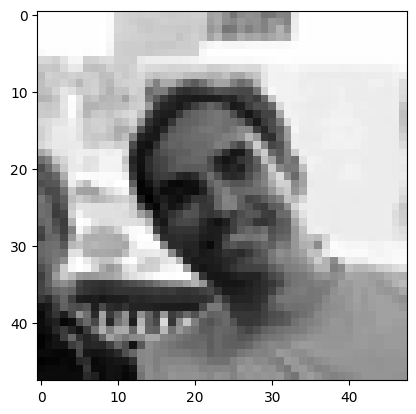

In [9]:
image = r'img_dfds\Test\Real\real_5.jpg'
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
plt.imshow(img.reshape(48,48),cmap='gray')
print("model prediction is ",pred_label)